# **WEATHER TYPE PREDICTION**


**Importing** **Packages**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
import pickle

In [ ]:
warnings.filterwarnings("ignore")

**Importing Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_file/weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


**About Dataset**

In [ ]:
lst=[['Temperature'],['Humidity'],['Wind Speed'],['Percipitation %'],['Cloud Cover'],['Atmospheric Pressure'],['UV Index'],['Season'],['Visibility'],['Location'],['Weather Type']]
table=pd.DataFrame(lst,columns=["Columns"])
table

,Columns
0,Temperature
1,Humidity
2,Wind Speed
3,Percipitation %
4,Cloud Cover
5,Atmospheric Pressure
6,UV Index
7,Season
8,Visibility
9,Location


In [ ]:
df.shape

(13200, 11)

**Checking for Missing Values**

In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


**Checking the Datatypes of columns**

In [ ]:
df.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


**Label Encoding**

In [ ]:
encoder=LabelEncoder()
df["Cloud Cover"]=encoder.fit_transform(df["Cloud Cover"])
df["Season"]=encoder.fit_transform(df["Season"])
df["Location"]=encoder.fit_transform(df["Location"])
df["Weather Type"]=encoder.fit_transform(df["Weather Type"])
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2


**Understanding the Correlation**

In [ ]:
df.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.224642,0.209188,0.374773,-0.377942,0.250751,-0.196108,0.028923
Humidity,-0.207969,1.000000,0.406079,0.638631,0.277199,-0.120653,-0.342694,0.189145,-0.479969,0.079968,-0.250558
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.183863,-0.077757,-0.068147,0.058676,-0.311828,0.014091,-0.166485
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.267368,-0.177444,-0.291601,0.210372,-0.457444,0.091911,-0.161578
Cloud Cover,-0.224642,0.277199,0.183863,0.267368,1.000000,-0.096133,-0.347301,0.076947,-0.169604,0.030464,-0.536681
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.096133,1.000000,0.154128,-0.126795,0.120182,-0.077053,0.030679
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.347301,0.154128,1.000000,-0.201870,0.362922,-0.100510,0.345804
Season,-0.377942,0.189145,0.058676,0.210372,0.076947,-0.126795,-0.201870,1.000000,-0.231691,0.147115,0.118791
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.169604,0.120182,0.362922,-0.231691,1.000000,-0.093642,0.047448
Location,-0.196108,0.079968,0.014091,0.091911,0.030464,-0.077053,-0.100510,0.147115,-0.093642,1.000000,0.071665


#HeatMap of Correlation
To check the correlation between features and target

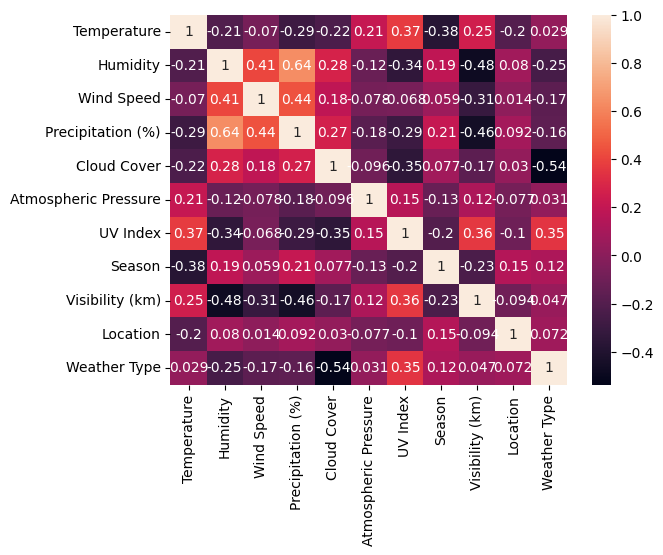

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**Checking for Outliers**

In [ ]:
c_names=['Temperature','Humidity','Wind Speed','Precipitation (%)',
                    'Cloud Cover','Atmospheric Pressure','UV Index',
                    'Visibility (km)']

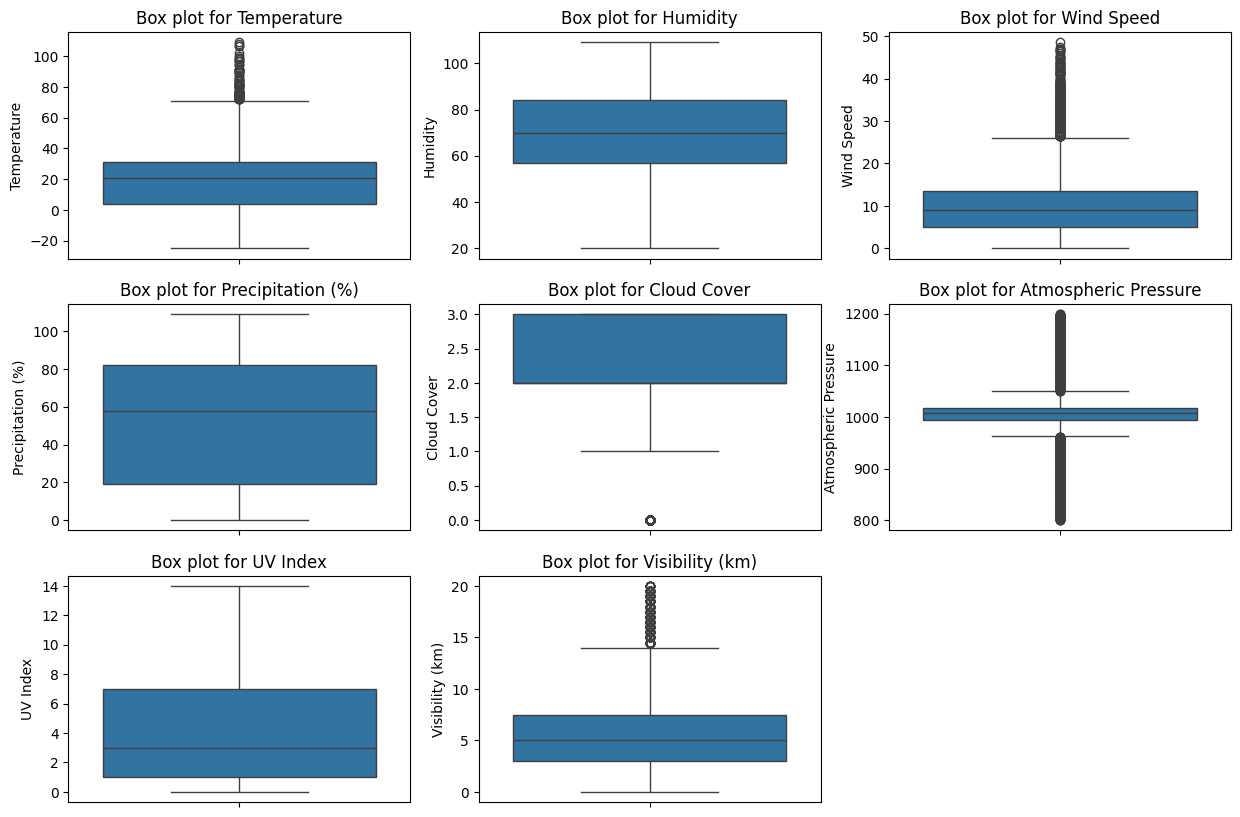

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(c_names)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[c_names[i]])
    plt.title(f'Box plot for {c_names[i]}')
plt.show()

In [ ]:
for i in c_names:
    lower_cap=df[i].quantile(0.05)
    upper_cap=df[i].quantile(0.95)
    df.loc[df[i]<lower_cap,i]=lower_cap
    df.loc[df[i]>upper_cap, i]=upper_cap

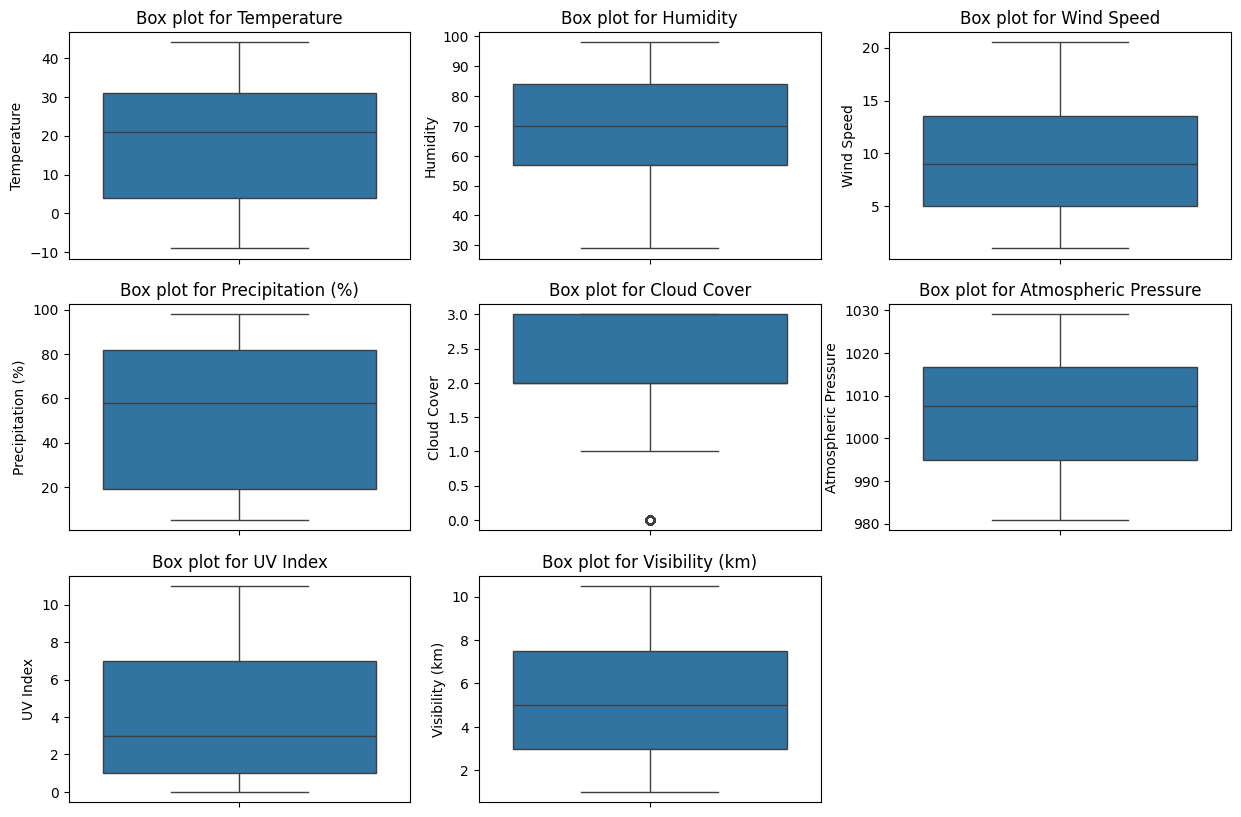

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(c_names)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[c_names[i]])
    plt.title(f'Box plot for {c_names[i]}')
plt.show()

In [ ]:
df.shape

(13200, 11)

Histogram for a better understanding

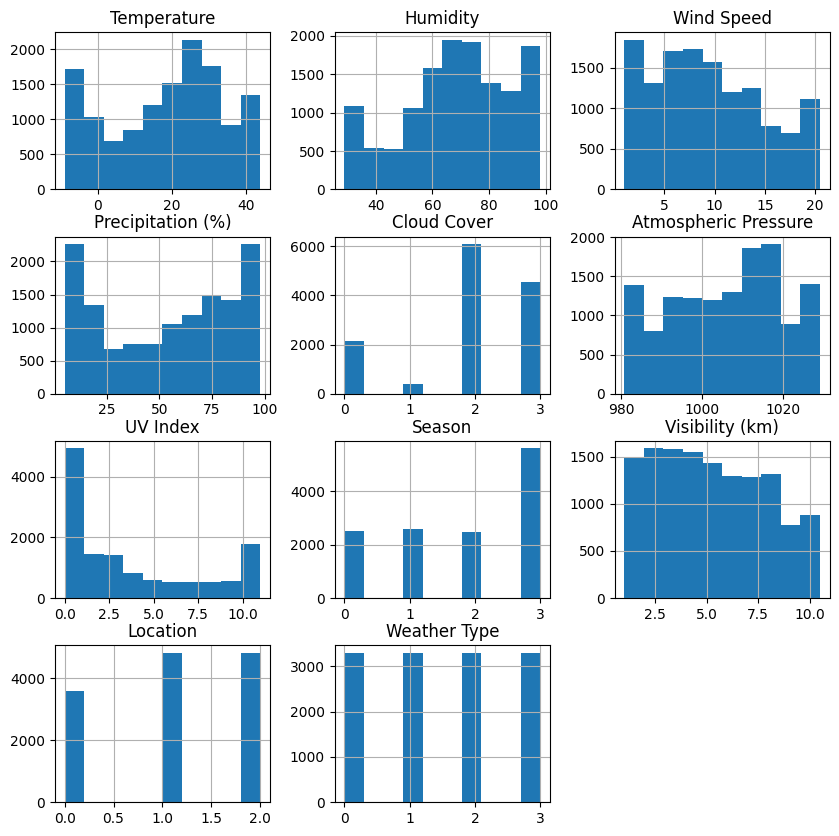

In [ ]:
df.hist(figsize=(10,10))
plt.show()

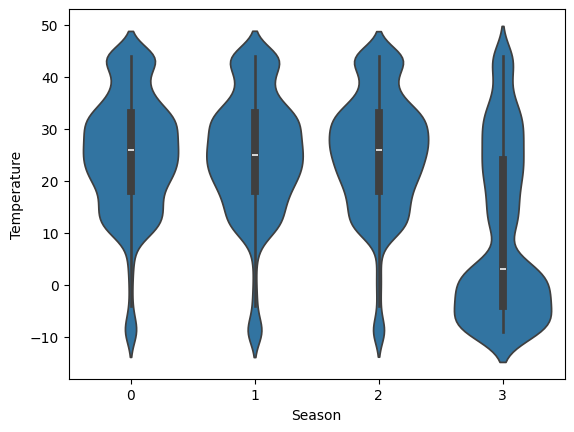

In [ ]:
sns.violinplot(x='Season',y='Temperature',data=df)
plt.show()

**Seperating Features and Target variable**

In [ ]:
X=df.iloc[:,:-1]
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2
13196,-1.0,76,3.5,23.0,1,1029.04,1,3,6.0,0
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1


In [ ]:
y=df.iloc[:,-1]
y

,Weather Type
0,1
1,0
2,3
3,3
4,1
...,...
13195,1
13196,2
13197,0
13198,2


**Checking** **For** **Imbalance**

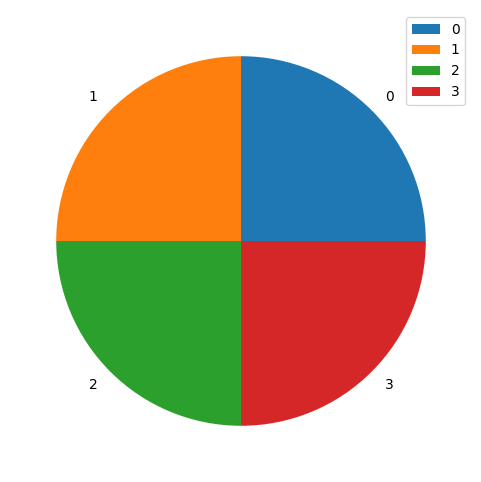

In [ ]:
T=df["Weather Type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(T,labels=[0,1,2,3])
plt.legend()
plt.show()

**Feature scaling using MinMaxScaler**

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.43396226, 0.63768116, 0.43589744, ..., 1.        , 0.26315789,
        0.5       ],
       [0.90566038, 0.97101449, 0.38461538, ..., 0.33333333, 0.94736842,
        0.5       ],
       [0.73584906, 0.50724638, 0.30769231, ..., 0.33333333, 0.47368421,
        1.        ],
       ...,
       [0.73584906, 0.69565217, 0.23076923, ..., 0.        , 0.84210526,
        0.        ],
       [0.22641509, 0.68115942, 0.46153846, ..., 1.        , 0.10526316,
        0.5       ],
       [0.0754717 , 0.13043478, 0.        , ..., 0.        , 0.94736842,
        1.        ]])

**Seperating the Dataset into training in testing sets**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**KNN MODEL**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 2, ..., 2, 3, 3])

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       996
           1       0.87      0.90      0.88      1006
           2       0.94      0.92      0.93       990
           3       0.93      0.89      0.91       968

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



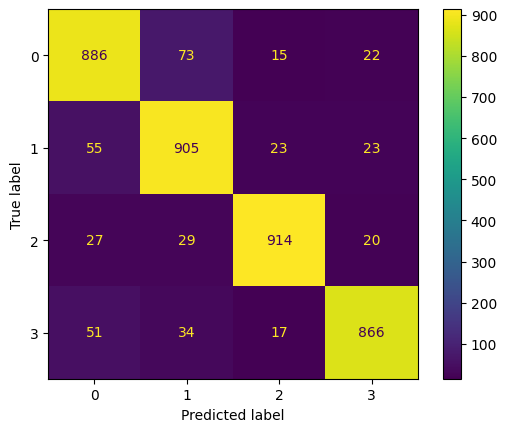

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

**SVC MODEL**

In [ ]:
model=SVC()
model.fit(X_train,y_train)
y_pred1=model.predict(X_test)
y_pred1

array([1, 1, 2, ..., 2, 3, 3])

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       996
           1       0.91      0.90      0.90      1006
           2       0.94      0.93      0.94       990
           3       0.88      0.91      0.90       968

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



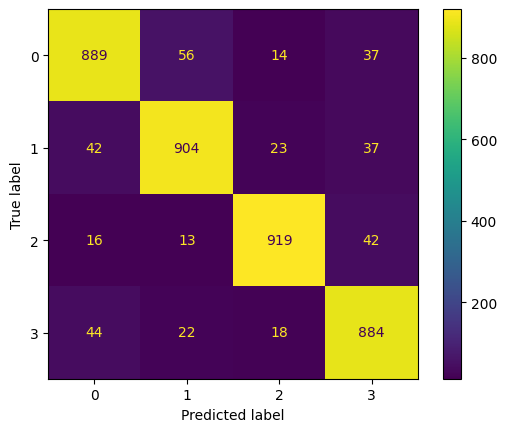

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

**Naive Bayes Model**

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=model.predict(X_test)
y_pred2

array([1, 1, 2, ..., 2, 3, 3])

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       996
           1       0.91      0.90      0.90      1006
           2       0.94      0.93      0.94       990
           3       0.88      0.91      0.90       968

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



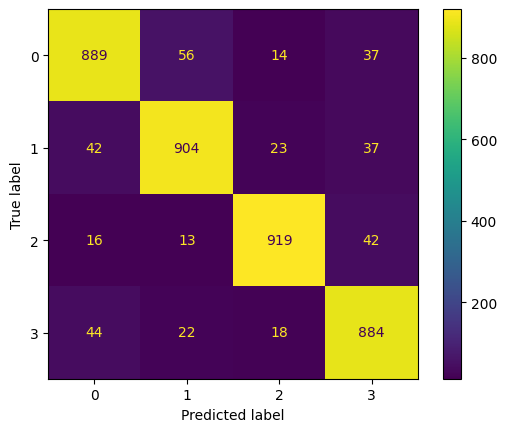

In [ ]:
print(classification_report(y_test,y_pred2))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([1, 1, 2, ..., 2, 3, 3])

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       996
           1       0.90      0.89      0.89      1006
           2       0.91      0.93      0.92       990
           3       0.91      0.92      0.91       968

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



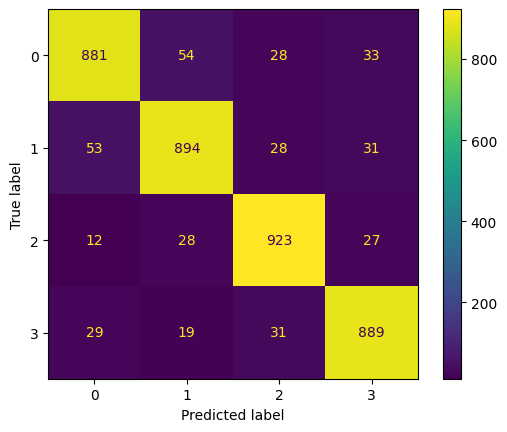

In [ ]:
print(classification_report(y_test,y_pred3))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))

**Random Forest Classifier Model**

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       996
           1       0.91      0.90      0.91      1006
           2       0.93      0.93      0.93       990
           3       0.92      0.92      0.92       968

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960



**Ada Boost Classifier Model**

In [ ]:
ab=AdaBoostClassifier(random_state=1)
ab.fit(X_train,y_train)
y_pred5=ab.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       996
           1       0.83      0.88      0.85      1006
           2       0.92      0.89      0.90       990
           3       0.93      0.83      0.88       968

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960



**Gradient Boost Classifier Model**

In [ ]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       996
           1       0.90      0.90      0.90      1006
           2       0.92      0.93      0.93       990
           3       0.93      0.91      0.92       968

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



**XGB classifier Model**

In [ ]:
xb=XGBClassifier(random_state=1)
xb.fit(X_train,y_train)
y_pred7=xb.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       996
           1       0.92      0.91      0.91      1006
           2       0.93      0.93      0.93       990
           3       0.90      0.93      0.91       968

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960



In [ ]:
lst=[['KNN',90],['SVC',91],['Naive Bayes',91],['Decision Tree',91],['Random Forest',92],['AdaBoost',87],['Gradient Boosting',91],['XGBoost',92]]
df2=pd.DataFrame(lst,columns=["Model Used","Accuracy Score in %"])
df2

,Model Used,Accuracy Score in %
0,KNN,90
1,SVC,91
2,Naive Bayes,91
3,Decision Tree,91
4,Random Forest,92
5,AdaBoost,87
6,Gradient Boosting,91
7,XGBoost,92


**AUC-ROC Curve**

In [ ]:
y_test_bin=label_binarize(y_test, classes=[0, 1, 2, 3])

In [ ]:
y_pred_prob=xb.predict_proba(X_test)

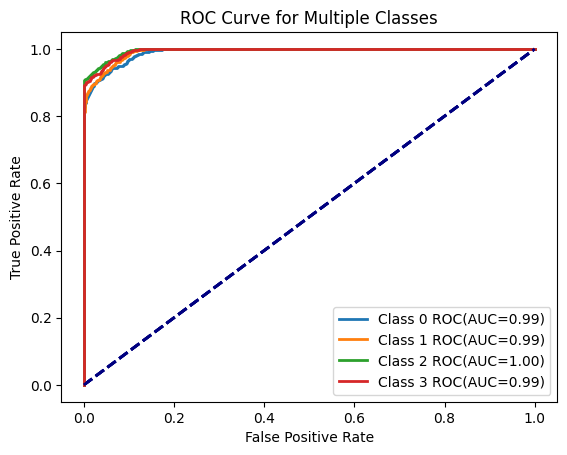

In [ ]:
for i in range(4):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_pred_prob[:,i])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=2,label=f'Class {i} ROC(AUC={roc_auc:.2f})')
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pickle.dump(xb,open("weatherr.sav","wb"))
pickle.dump(scaler,open("scalerr.sav","wb"))